In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("../data_public/checkpoint.csv", index_col="station_id")
df.head()

,tl,rf,ff,ffx,cglo,so_h,rr,rrm,tb10,tb20
station_id,,,,,,,,,,
1,99.99,99.99,99.92,99.84,99.99,100.00,99.57,99.99,8.47,0.00
2,99.94,99.78,100.00,100.00,99.93,100.00,99.82,100.00,99.92,99.94
3,99.98,99.99,99.99,99.99,99.99,100.00,99.97,99.99,100.00,99.04
4,99.97,99.97,99.85,99.86,99.99,99.99,99.67,99.97,9.45,24.29
5,99.93,99.93,99.93,99.93,0.00,100.00,98.95,99.92,0.00,0.00


In [3]:
df_filtered = df[df.min(axis=1) >= 90.0]

print(f"{len(df_filtered)} Stationen erfüllen die Bedingung.")
print(df_filtered.head())

150 Stationen erfüllen die Bedingung.
                tl      rf      ff     ffx   cglo   so_h     rr     rrm  \
station_id                                                                
2            99.94   99.78  100.00  100.00  99.93  100.0  99.82  100.00   
3            99.98   99.99   99.99   99.99  99.99  100.0  99.97   99.99   
7           100.00  100.00   99.96   99.96  99.93  100.0  98.82   99.91   
13           99.72   99.72   99.71   99.71  99.72  100.0  99.63   99.73   
18           99.94   99.99   99.99   99.99  99.99  100.0  99.88   99.99   

              tb10   tb20  
station_id                 
2            99.92  99.94  
3           100.00  99.04  
7           100.00  93.69  
13           98.75  99.11  
18           99.65  99.99  


In [4]:
top_stations = df.mean(axis=1).sort_values(ascending=False).head(20).index.tolist()
print("Top 20 Stationen:", top_stations)

Top 20 Stationen: [55, 17901, 134, 4224, 48, 20212, 19205, 16413, 112, 7604, 58, 13907, 146, 11402, 80, 10510, 70, 4305, 2503, 150]


In [5]:
df.mean(axis=1).sort_values(ascending=False).head(150)

station_id
55       100.000
17901    100.000
134       99.998
4224      99.998
48        99.996
          ...   
86        98.685
16421     98.685
51        98.147
4081      98.147
10415     98.132
Length: 150, dtype: float64

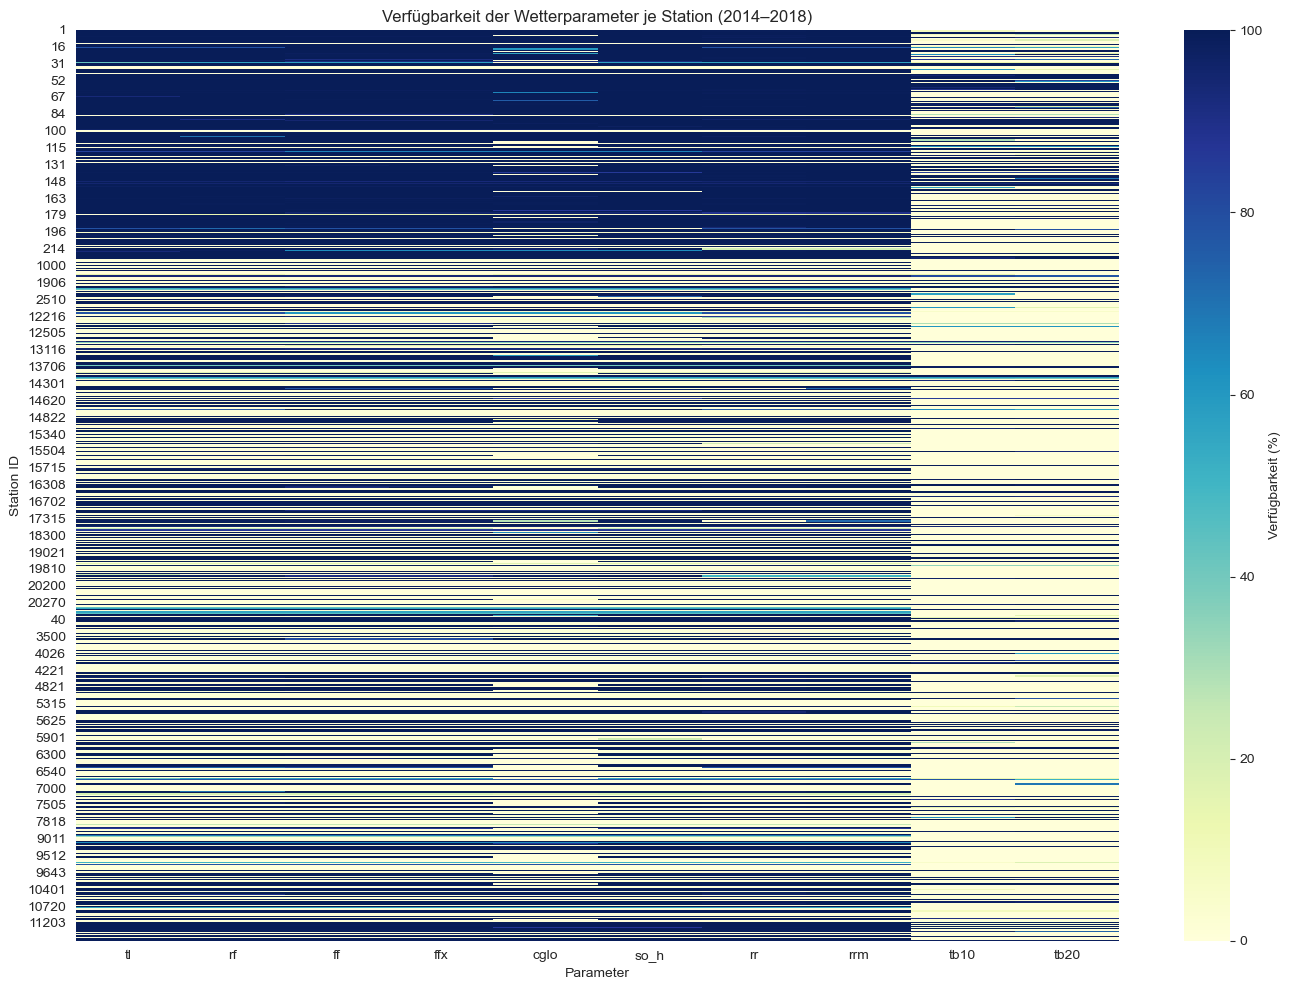

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data_public/checkpoint.csv", index_col="station_id")
plt.figure(figsize=(14, 10))
sns.heatmap(df, cmap="YlGnBu", annot=False, vmin=0, vmax=100, cbar_kws={'label': 'Verfügbarkeit (%)'})
plt.title("Verfügbarkeit der Wetterparameter je Station (2014–2018)")
plt.xlabel("Parameter")
plt.ylabel("Station ID")
plt.tight_layout()
plt.show()

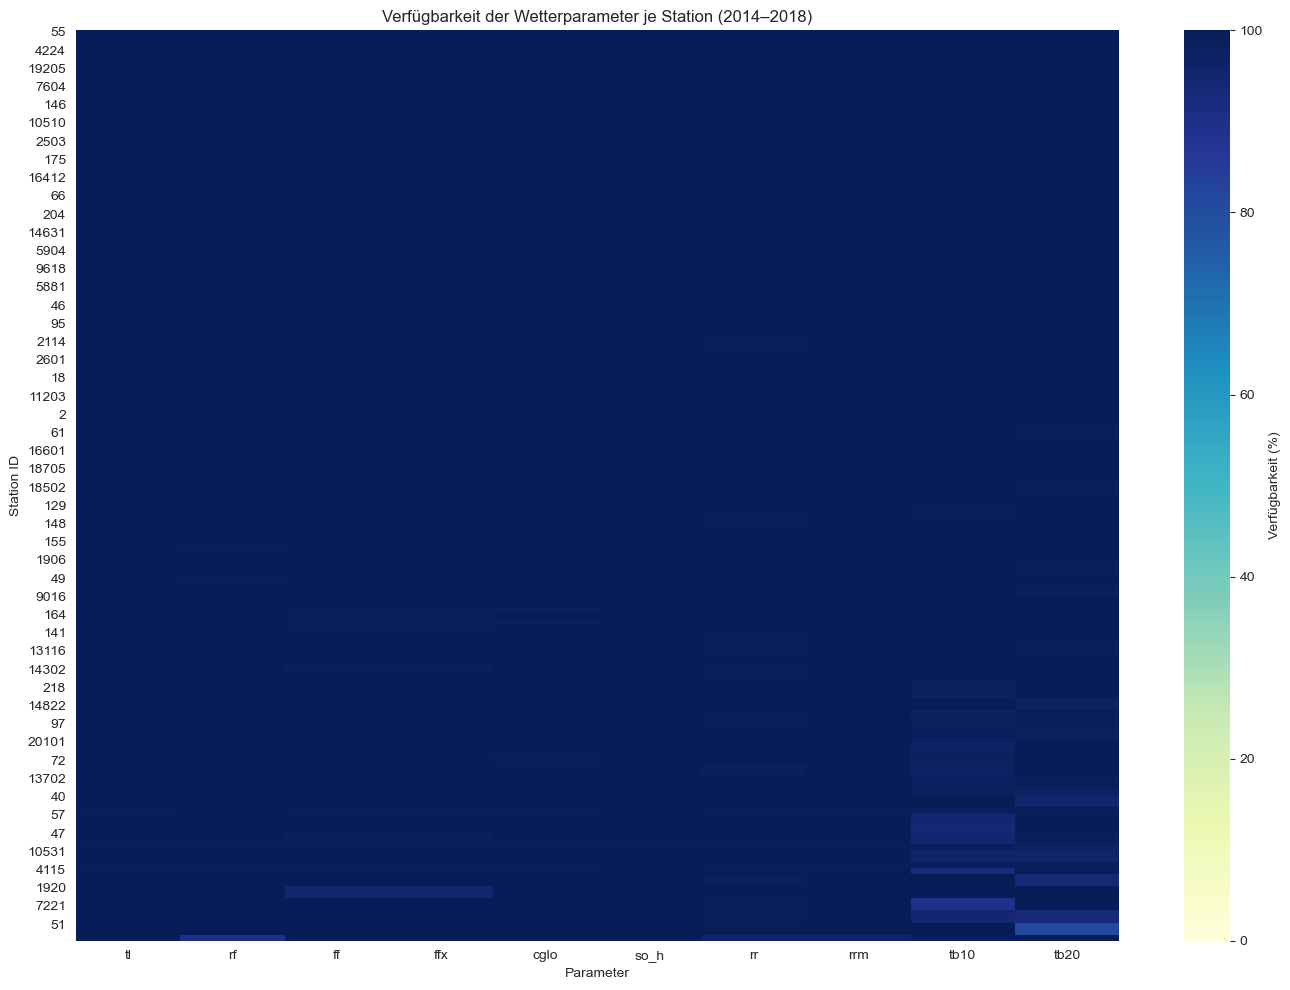

In [7]:
top_stations = df.mean(axis=1).sort_values(ascending=False).head(150).index.tolist()
df_filtered = df.loc[top_stations]
plt.figure(figsize=(14, 10))
sns.heatmap(df_filtered, cmap="YlGnBu", annot=False, vmin=0, vmax=100, cbar_kws={'label': 'Verfügbarkeit (%)'})
plt.title("Verfügbarkeit der Wetterparameter je Station (2014–2018)")
plt.xlabel("Parameter")
plt.ylabel("Station ID")
plt.tight_layout()
plt.show()

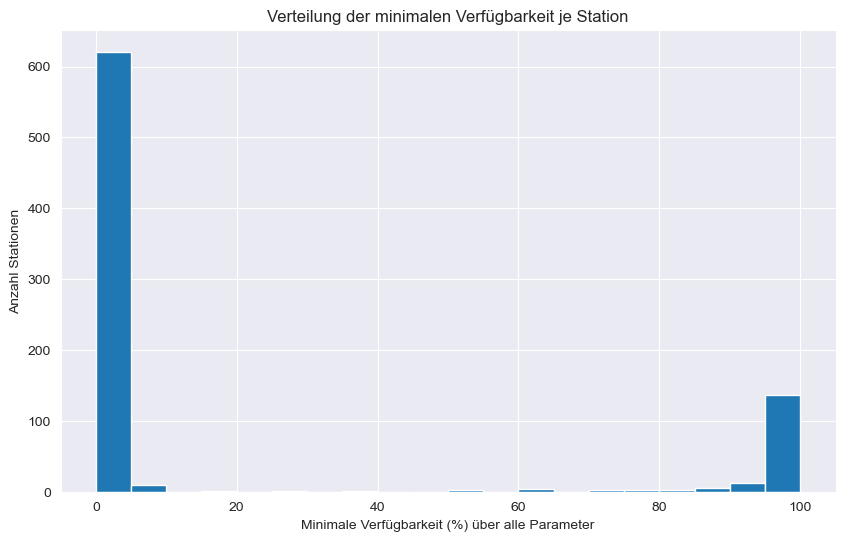

In [8]:
df["min_abdeckung"] = df.min(axis=1)
df["min_abdeckung"].hist(bins=20, figsize=(10, 6))
plt.title("Verteilung der minimalen Verfügbarkeit je Station")
plt.xlabel("Minimale Verfügbarkeit (%) über alle Parameter")
plt.ylabel("Anzahl Stationen")
plt.grid(True)
plt.show()

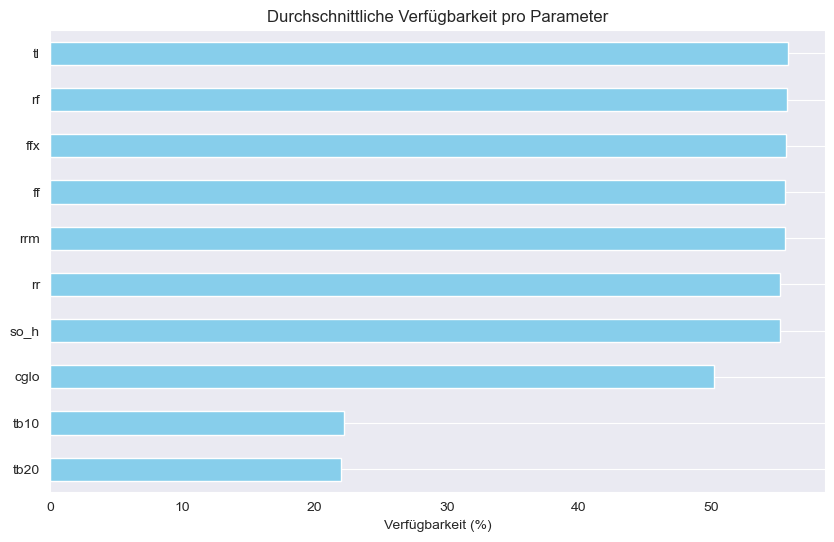

In [9]:
mean_per_param = df.drop(columns="min_abdeckung", errors="ignore").mean().sort_values()
mean_per_param.plot(kind="barh", figsize=(10, 6), color="skyblue")
plt.title("Durchschnittliche Verfügbarkeit pro Parameter")
plt.xlabel("Verfügbarkeit (%)")
plt.grid(axis="x")
plt.show()

In [10]:
mean_per_param

tb20    21.994222
tb10    22.230111
cglo    50.233852
so_h    55.166173
rr      55.208074
rrm     55.532012
ff      55.596296
ffx     55.618753
rf      55.714617
tl      55.789815
dtype: float64

In [16]:
df.describe()

,tl,rf,ff,ffx,cglo,so_h,rr,rrm,tb10,tb20,min_abdeckung
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,55.789815,55.714617,55.596296,55.618753,50.233852,55.166173,55.208074,55.532012,22.230111,21.994222,20.705012
std,48.697810,48.636598,48.543666,48.562743,48.813276,48.734231,48.524172,48.577811,40.460261,40.165645,39.284565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.290000,99.270000,98.395000,98.760000,58.220000,99.525000,98.640000,99.290000,0.000000,0.000000,0.000000
75%,99.990000,99.990000,99.940000,99.940000,99.980000,100.000000,99.820000,99.990000,5.420000,6.670000,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


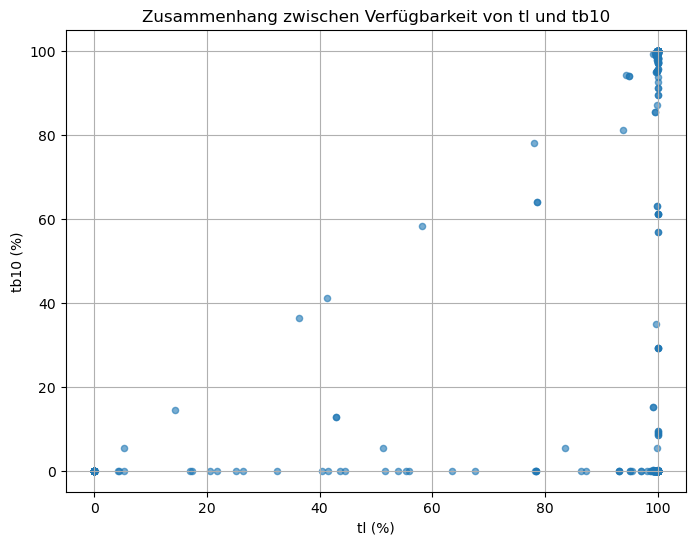

In [23]:
df.plot.scatter(x="tl", y="tb10", alpha=0.6, figsize=(8, 6))
plt.title("Zusammenhang zwischen Verfügbarkeit von tl und tb10")
plt.xlabel("tl (%)")
plt.ylabel("tb10 (%)")
plt.grid(True)
plt.show()

In [25]:
df_filtered.index.to_list()

[2,
 3,
 7,
 13,
 18,
 24,
 30,
 31,
 32,
 46,
 47,
 48,
 49,
 54,
 55,
 56,
 57,
 58,
 61,
 66,
 70,
 72,
 73,
 77,
 80,
 86,
 89,
 90,
 91,
 92,
 95,
 97,
 103,
 105,
 106,
 112,
 115,
 119,
 122,
 124,
 127,
 129,
 132,
 134,
 136,
 141,
 142,
 145,
 146,
 148,
 149,
 150,
 154,
 155,
 158,
 164,
 169,
 172,
 175,
 179,
 181,
 197,
 199,
 204,
 218,
 222,
 500,
 1415,
 1802,
 1906,
 1920,
 2114,
 2207,
 2503,
 2601,
 12615,
 12711,
 13116,
 13702,
 13907,
 14115,
 14302,
 14311,
 14631,
 14822,
 15002,
 15105,
 15501,
 15702,
 15912,
 16101,
 16412,
 16413,
 16421,
 16601,
 16800,
 17301,
 17901,
 18111,
 18225,
 18502,
 18622,
 18705,
 19021,
 19205,
 20101,
 20212,
 20270,
 20412,
 37,
 40,
 3202,
 3805,
 4115,
 4125,
 4224,
 4305,
 4705,
 5012,
 5412,
 5421,
 5625,
 5701,
 5735,
 5805,
 5881,
 5904,
 5972,
 6102,
 6305,
 7110,
 7505,
 7604,
 7641,
 7710,
 7955,
 9016,
 9211,
 9618,
 9801,
 9811,
 10510,
 10531,
 11115,
 11135,
 11203,
 11305,
 11402,
 11804,
 19911]

In [26]:
df_filtered.to_csv("../data_public/beste_stationen.csv")

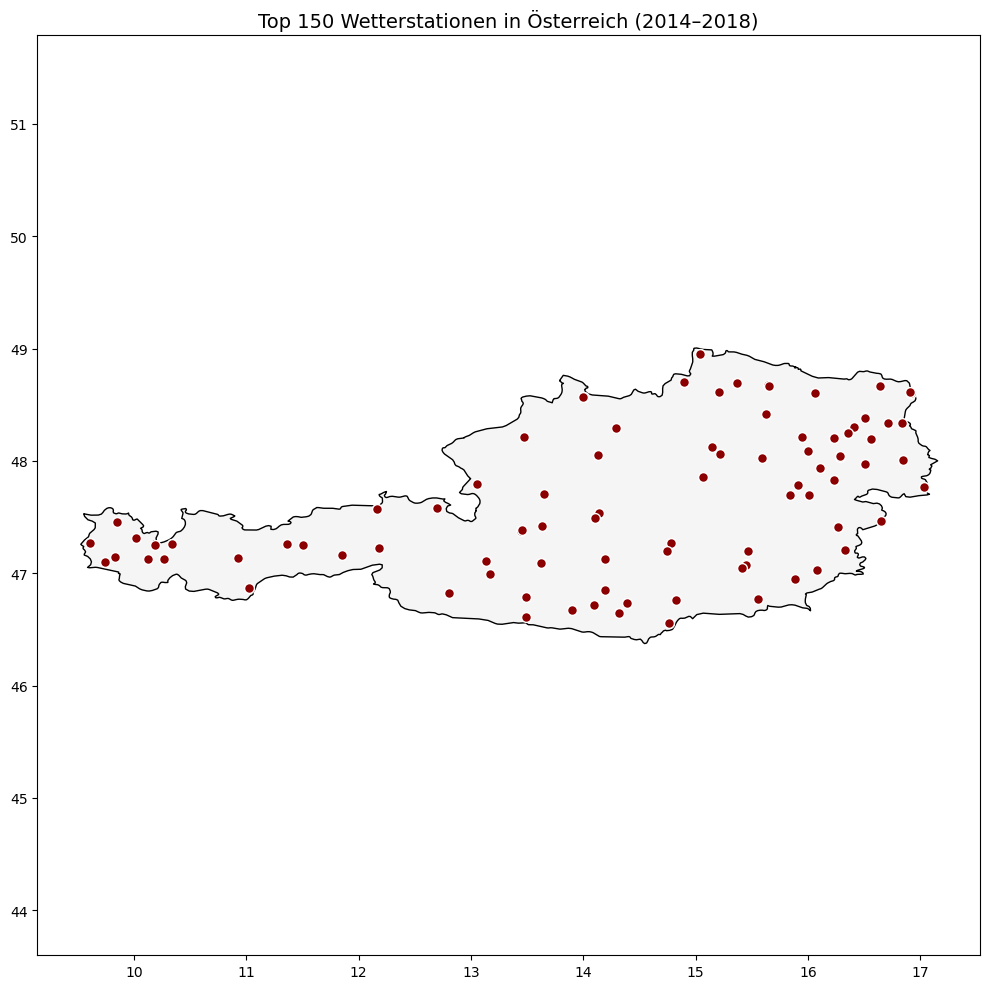

In [32]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests
from shapely.geometry import Point

# 1. Lade Metadaten zu den Stationen
meta_url = "https://dataset.api.hub.geosphere.at/v1/station/historical/klima-v2-1h/metadata"
response = requests.get(meta_url)
stations_meta = pd.DataFrame(response.json()["stations"])

# 2. Filter auf die Top 150 Stationen
top_150_ids = df_filtered.index.tolist()
stations_top = stations_meta[stations_meta["id"].isin(top_150_ids)].copy()

# 3. Erzeuge GeoDataFrame mit Koordinaten
stations_top["geometry"] = stations_top.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
gdf = gpd.GeoDataFrame(stations_top, geometry="geometry", crs="EPSG:4326")

# 4. Lade Österreich-Polygon aus GeoJSON
countries_url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(countries_url)
austria = world[world['name'] == 'Austria'].to_crs(gdf.crs)

# 5. Plot
fig, ax = plt.subplots(figsize=(10, 10))
austria.plot(ax=ax, color="whitesmoke", edgecolor="black")
gdf.plot(ax=ax, color="darkred", markersize=50, edgecolor="white")
ax.set_title("Top 150 Wetterstationen in Österreich (2014–2018)", fontsize=14)
plt.axis("equal")
plt.tight_layout()
plt.show()


In [35]:
import requests
import pandas as pd
import time
from tqdm import tqdm

# --- Konfiguration ---
start = "2014-01-01T00:00"
end = "2018-01-31T23:00"
parameters = ["tl", "rf", "ff", "ffx", "cglo", "so_h", "rr", "rrm", "tb10", "tb20"]
param_str = ",".join(parameters)
base_url = "https://dataset.api.hub.geosphere.at/v1/station/historical/klima-v2-1h"

# --- Top 150 Stationen aus checkpoint.csv laden ---
df_checkpoint = pd.read_csv("../data_public/checkpoint.csv", index_col="station_id")
top_150_ids = df_checkpoint.mean(axis=1).sort_values(ascending=False).head(150).index.tolist()

# --- Daten abrufen ---
all_data = []

for sid in tqdm(top_150_ids, desc="Lade Wetterdaten"):
    params = {
        "station_ids": sid,
        "parameters": param_str,
        "start": start,
        "end": end
    }
    try:
        response = requests.get(base_url, params=params, timeout=90)
        if response.status_code != 200:
            print(f"Fehler bei Station {sid}: {response.status_code}")
            continue
        data = response.json()
        timestamps = data.get("timestamps", [])
        features = data.get("features", [])
        if not features:
            continue
        param_data = features[0]["properties"]["parameters"]
        for i, ts in enumerate(timestamps):
            entry = {"timestamp": ts, "station_id": sid}
            for param in parameters:
                values = param_data.get(param, {}).get("data", [])
                entry[param] = values[i] if i < len(values) else None
            all_data.append(entry)
    except Exception as e:
        print(f"Fehler bei Station {sid}: {e}")
        continue
    time.sleep(1)  # zur Schonung der API

# --- DataFrame erzeugen und speichern ---
df_all = pd.DataFrame(all_data)
df_all["timestamp"] = pd.to_datetime(df_all["timestamp"])
df_all = df_all.sort_values(["station_id", "timestamp"])

df_all.to_csv("../data_public/wetterdaten_top150.csv.gz", index=False, compression="gzip")

Lade Wetterdaten: 100%|██████████| 150/150 [29:24<00:00, 11.77s/it]


In [3]:
df = pd.read_csv("../data/wetterdaten_top150.csv")
df.head()

,timestamp,station_id,tl,rf,ff,ffx,cglo,so_h,rr,rrm,tb10,tb20
0,2014-01-01 00:00:00+00:00,2,-2.7,93.0,1.7,2.6,0.0,0.0,0.0,0.0,0.5,1.1
1,2014-01-01 01:00:00+00:00,2,-2.6,92.0,1.5,3.2,0.0,0.0,0.0,0.0,0.5,1.1
2,2014-01-01 02:00:00+00:00,2,-2.3,92.0,1.0,2.6,0.0,0.0,0.0,0.0,0.5,1.1
3,2014-01-01 03:00:00+00:00,2,-2.2,90.0,1.2,3.4,0.0,0.0,0.0,0.0,0.5,1.1
4,2014-01-01 04:00:00+00:00,2,-2.4,90.0,2.4,3.6,0.0,0.0,0.0,0.0,0.5,1.1


In [4]:
df.to_csv("../data_public/wetterdaten_top150.csv.gz", index=False, compression="gzip")

In [2]:
df = pd.read_csv("../data/wetterdaten_top150.csv.gz")
df.head()

,timestamp,station_id,tl,rf,ff,ffx,cglo,so_h,rr,rrm,tb10,tb20
0,2014-01-01 00:00:00+00:00,2,-2.7,93.0,1.7,2.6,0.0,0.0,0.0,0.0,0.5,1.1
1,2014-01-01 01:00:00+00:00,2,-2.6,92.0,1.5,3.2,0.0,0.0,0.0,0.0,0.5,1.1
2,2014-01-01 02:00:00+00:00,2,-2.3,92.0,1.0,2.6,0.0,0.0,0.0,0.0,0.5,1.1
3,2014-01-01 03:00:00+00:00,2,-2.2,90.0,1.2,3.4,0.0,0.0,0.0,0.0,0.5,1.1
4,2014-01-01 04:00:00+00:00,2,-2.4,90.0,2.4,3.6,0.0,0.0,0.0,0.0,0.5,1.1


NaN-Anteil pro Spalte in %:
tb20          0.745234
tb10          0.737973
rr            0.231233
ff            0.161603
ffx           0.160039
rf            0.105693
cglo          0.071939
rrm           0.054885
tl            0.032730
so_h          0.004803
timestamp     0.000000
station_id    0.000000
dtype: float64


C:\Users\johannes.misensky\AppData\Local\Temp\ipykernel_23424\5907715.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_time = df.groupby("timestamp").apply(lambda x: x.isna().sum())


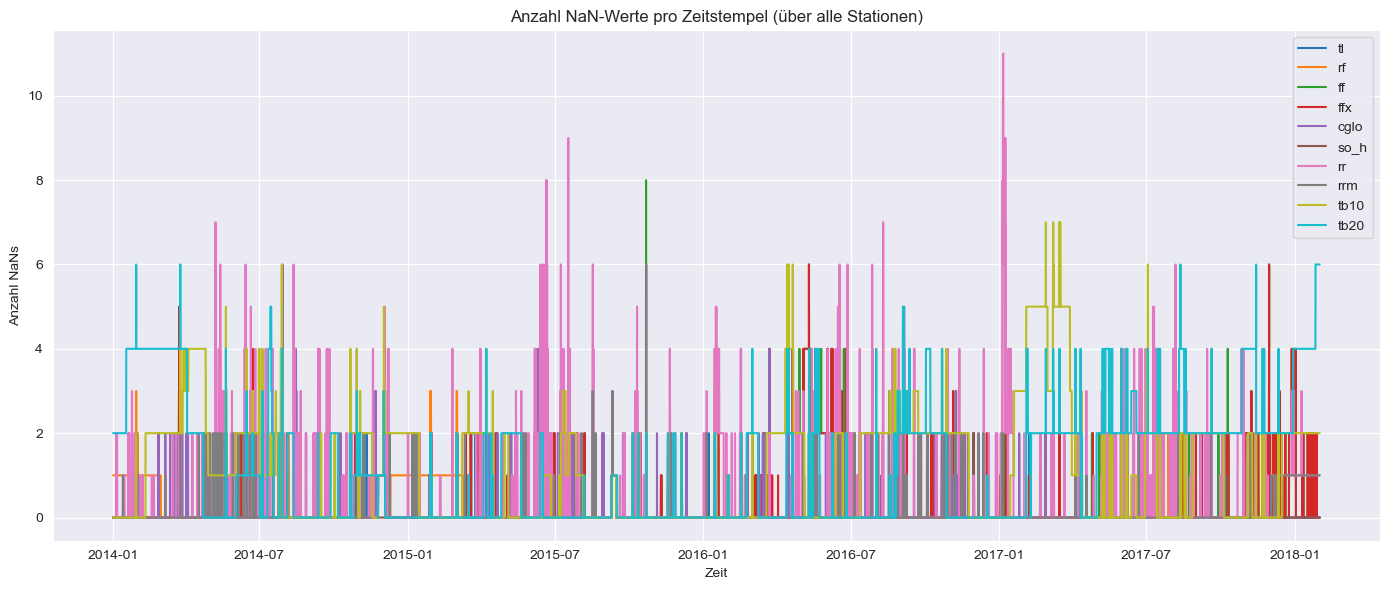

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datei laden (komprimiert)
df = pd.read_csv("../data/wetterdaten_top150.csv.gz", parse_dates=["timestamp"])

# NaN-Analyse: Anteil pro Parameter
nan_summary = df.isna().mean() * 100
print("NaN-Anteil pro Spalte in %:")
print(nan_summary.sort_values(ascending=False))

# NaN pro Zeitstempel (über alle Stationen hinweg)
nan_time = df.groupby("timestamp").apply(lambda x: x.isna().sum())

# Plot: Zeitliche Entwicklung der NaNs je Parameter
plt.figure(figsize=(14, 6))
for col in ["tl", "rf", "ff", "ffx", "cglo", "so_h", "rr", "rrm", "tb10", "tb20"]:
    plt.plot(nan_time.index, nan_time[col], label=col)

plt.legend(loc="upper right")
plt.title("Anzahl NaN-Werte pro Zeitstempel (über alle Stationen)")
plt.xlabel("Zeit")
plt.ylabel("Anzahl NaNs")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
plt.show()

In [11]:
df = df.sort_values(["station_id", "timestamp"])

# Liste der Wetterparameter
parameters = ["tl", "rf", "ff", "ffx", "cglo", "so_h", "rr", "rrm", "tb10", "tb20"]

# Ergebnis-DataFrame vorbereiten
results = []

# Funktion zum Berechnen von NaN-Lücken
def calculate_nan_gaps(series):
    is_nan = series.isna()
    gaps = (is_nan != is_nan.shift()).cumsum()[is_nan]
    gap_lengths = gaps.value_counts()
    return gap_lengths.max() if not gap_lengths.empty else 0, gap_lengths.mean() if not gap_lengths.empty else 0

# Schleife über alle Parameter
for param in parameters:
    all_lengths = []

    for station_id, group in df.groupby("station_id"):
        max_gap, mean_gap = calculate_nan_gaps(group[param])
        all_lengths.append((max_gap, mean_gap))

    max_all = max(g[0] for g in all_lengths)
    mean_all = np.mean([g[1] for g in all_lengths])
    results.append({"parameter": param, "max_gap": max_all, "mean_gap": round(mean_all, 2)})

# Ergebnisse als DataFrame
gap_df = pd.DataFrame(results)
print(gap_df.sort_values("max_gap", ascending=False))

  parameter  max_gap  mean_gap
9      tb20     6624    168.65
8      tb10     3227    123.30
1        rf     2174     11.15
2        ff     1851     21.99
3       ffx     1851     22.50
7       rrm     1307      6.98
6        rr     1307      8.45
4      cglo      430      8.47
0        tl      215      5.33
5      so_h      131      0.81


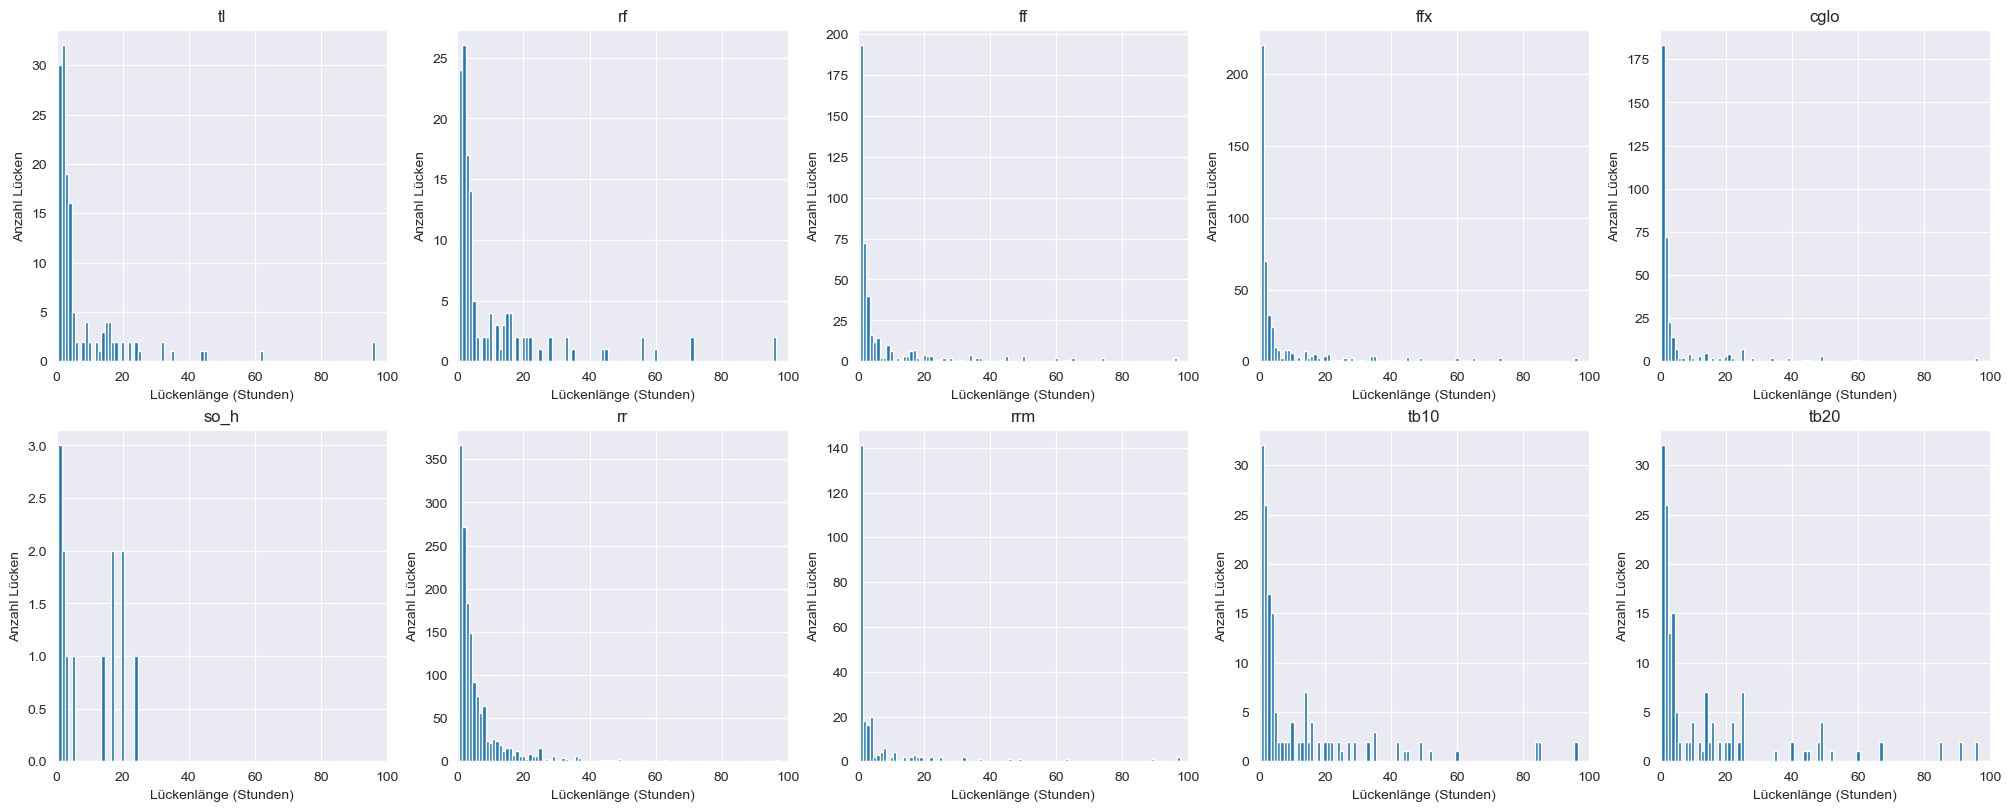

In [10]:
parameters = ["tl", "rf", "ff", "ffx", "cglo", "so_h", "rr", "rrm", "tb10", "tb20"]

# 3. Lückenlängen sammeln
gap_lengths = {param: [] for param in parameters}

for param in parameters:
    # für jede Station separat betrachten, damit Lücken nicht über Stationswechsel gehen
    for station_id, group in df.groupby("station_id"):
        is_nan = group[param].isna().values
        count = 0
        for flag in is_nan:
            if flag:
                count += 1
            elif count > 0:
                gap_lengths[param].append(count)
                count = 0
        if count > 0:
            gap_lengths[param].append(count)

# 4. Histogramm plotten (2×5 Subplots)
fig, axes = plt.subplots(2, 5, figsize=(20, 8), constrained_layout=True)

for ax, param in zip(axes.flat, parameters):
    data = gap_lengths[param]
    if len(data) == 0:
        ax.text(0.5, 0.5, "Keine Lücken", ha="center", va="center")
    else:
        max_len = max(data)
        bins = np.arange(1, max_len + 2) - 0.5  # Bins für ganzzahlige Längen
        ax.hist(data, bins=bins)
    ax.set_title(param)
    ax.set_xlabel("Lückenlänge (Stunden)")
    ax.set_ylabel("Anzahl Lücken")
    ax.set_xlim(0, min(max_len, 100))  # z.B. auf 100h zoomen

plt.show()


           max_gap  mean_gap
parameter                   
tb20          6624    249.73
tb10          3227    238.22
rf            2174     24.29
ff            1851     50.49
ffx           1851     49.92
rrm           1307     16.53
rr            1307     36.00
cglo           430     20.26
tl             215      9.08
so_h           131      1.49


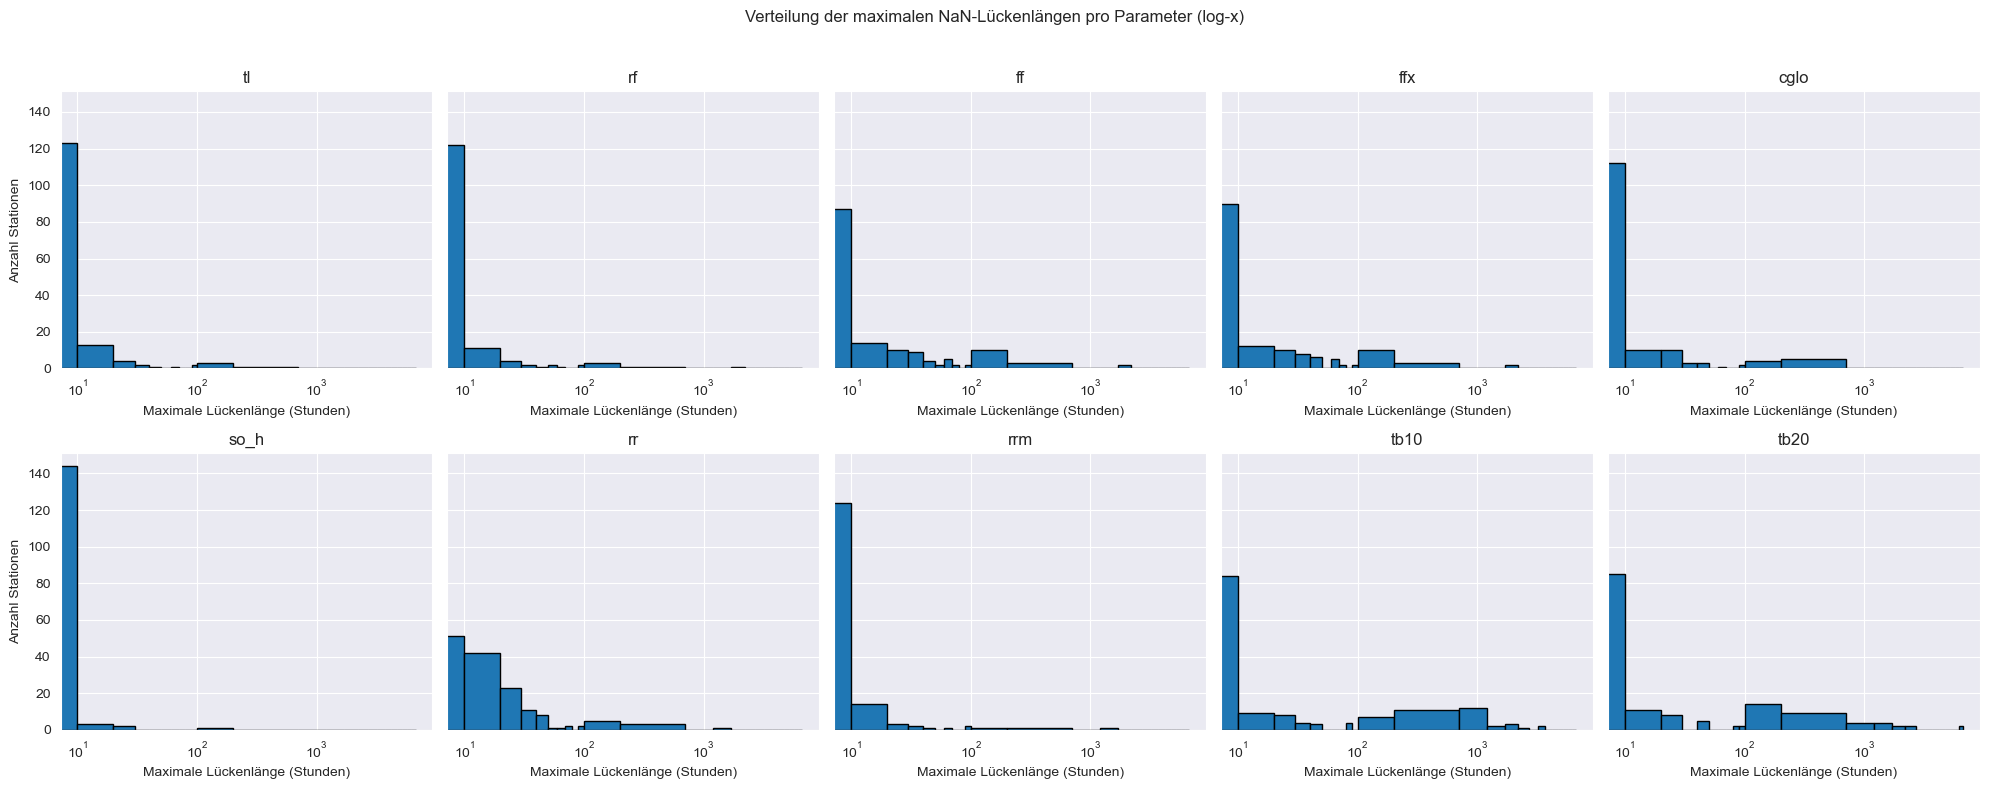

In [13]:
df = pd.read_csv("../data/wetterdaten_top150.csv.gz", parse_dates=["timestamp"])
df = df.sort_values(["station_id", "timestamp"])

# 2. Liste der Wetterparameter
parameters = ["tl", "rf", "ff", "ffx", "cglo", "so_h", "rr", "rrm", "tb10", "tb20"]

# 3. Funktion zum Berechnen von NaN-Lücken
def calculate_nan_gaps(series):
    is_nan = series.isna()
    gaps = (is_nan != is_nan.shift()).cumsum()[is_nan]
    lengths = gaps.value_counts()
    max_gap = int(lengths.max()) if not lengths.empty else 0
    mean_gap = float(lengths.mean()) if not lengths.empty else 0.0
    return max_gap, mean_gap

# 4. Lückenstatistik sammeln
results = []
per_station = {param: [] for param in parameters}

for param in parameters:
    for station_id, group in df.groupby("station_id"):
        max_gap, _ = calculate_nan_gaps(group[param])
        per_station[param].append(max_gap)
    overall_max = max(per_station[param])
    overall_mean = round(np.mean(per_station[param]), 2)
    results.append({"parameter": param, "max_gap": overall_max, "mean_gap": overall_mean})

gap_df = pd.DataFrame(results).set_index("parameter")
print(gap_df.sort_values("max_gap", ascending=False))

# 5. Histogramme der maximalen Lückenlängen
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharey=True)
axes = axes.flatten()

# Gemeinsame Bins definieren
bins = np.concatenate([
    np.arange(0, 101, 10),                                    # 0–100 in 10er-Schritten
    np.arange(200, gap_df["max_gap"].max() + 500, 500)        # größere Lücken in 500er-Schritten
])

for idx, (ax, param) in enumerate(zip(axes, parameters)):
    ax.hist(per_station[param], bins=bins, edgecolor='black')
    ax.set_title(param)
    ax.set_xlabel("Maximale Lückenlänge (Stunden)")
    # Linke Spalte bekommt Y-Label
    if idx % 5 == 0:
        ax.set_ylabel("Anzahl Stationen")
    # x-Achse logarithmisch, damit Ausreißer sichtbar bleiben
    ax.set_xscale("log")

plt.suptitle("Verteilung der maximalen NaN-Lückenlängen pro Parameter (log-x)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()